# Problem

+ Given a set of features extracted from the shape of the beans in images 
+ Required to Classify the type of each bean. 
+ There are 7 bean types in this dataset.

## https://www.kaggle.com/c/dry-beans-classification-iti-ai-pro-intake01

# Ranked 17th

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set(rc = {'figure.figsize':(15,7),})
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import *
from catboost import CatBoostRegressor
# Sklearn
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, RepeatedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error, classification_report, accuracy_score,f1_score,confusion_matrix
from catboost import CatBoostClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

ModuleNotFoundError: No module named 'catboost'

In [3]:
df_data = pd.read_csv("data/train.csv")
or_enc =  OrdinalEncoder()
# Encoding Targert 
df_data["y_encoded"] = or_enc.fit_transform(np.array(df_data["y"]).reshape(-1,1))
df_data.head(2)

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y,y_encoded
0,0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ,4.0
1,1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER,5.0


In [4]:
cols = list(df_data.columns)
cols.remove('y')
cols.remove("ID")

# Univariate Exploration

In [ ]:
['Area','Perimeter','MajorAxisLength', 'MinorAxisLength','AspectRation',
 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1',
 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4', 'y_encoded']

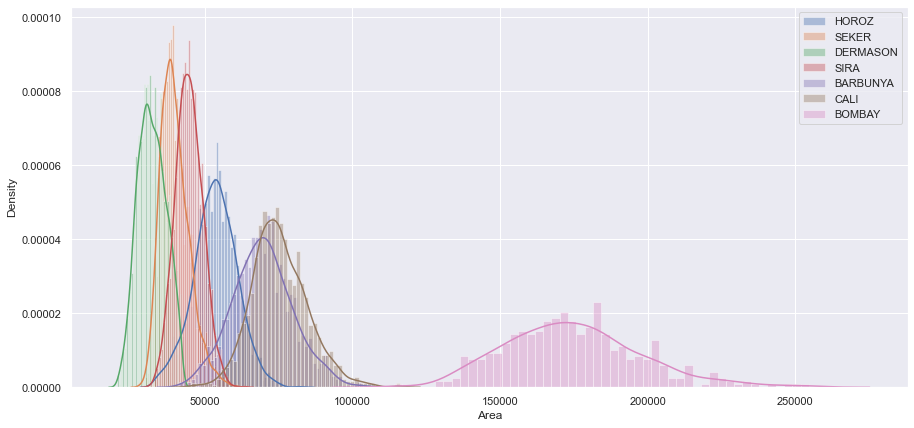

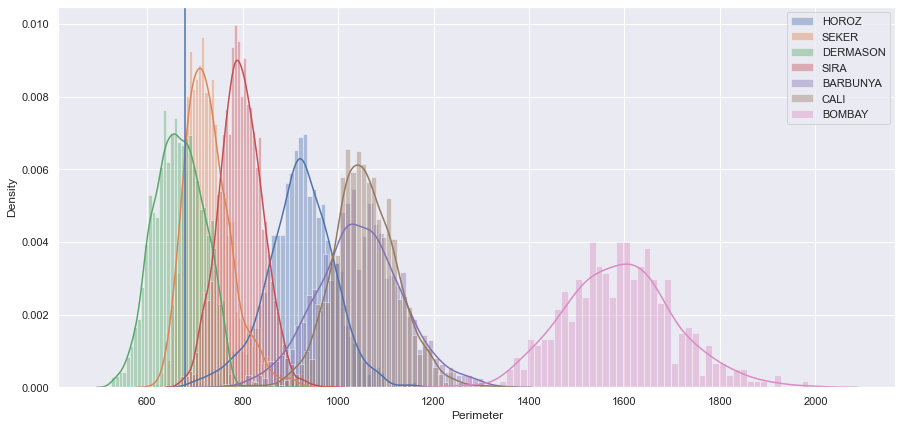

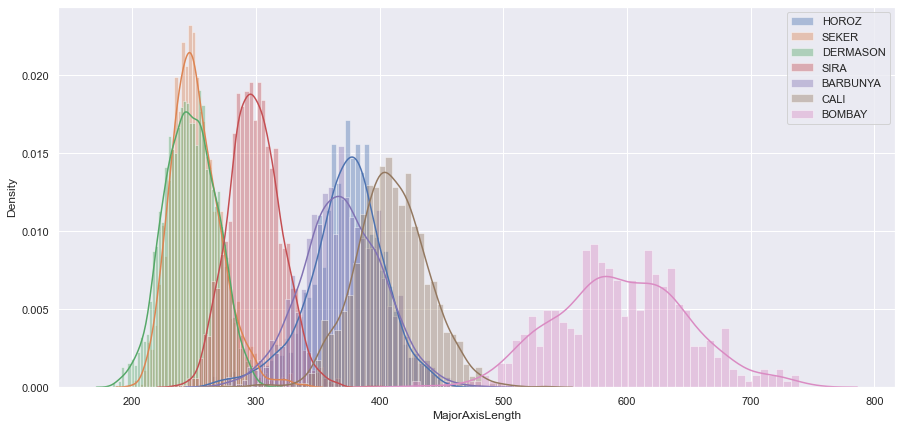

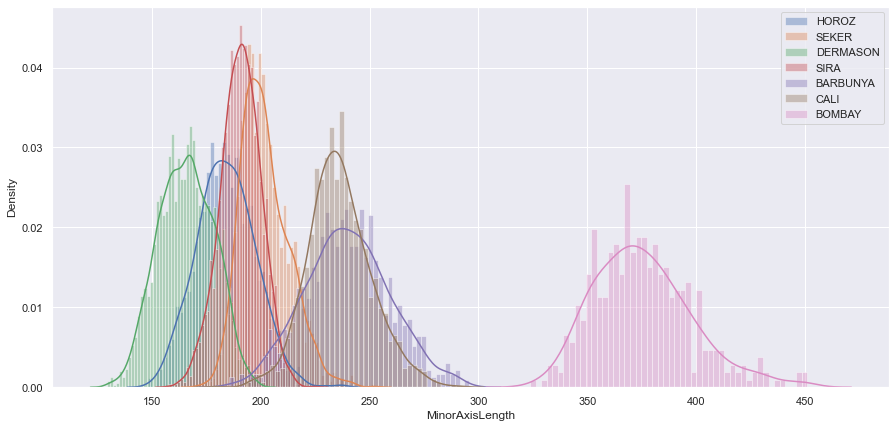

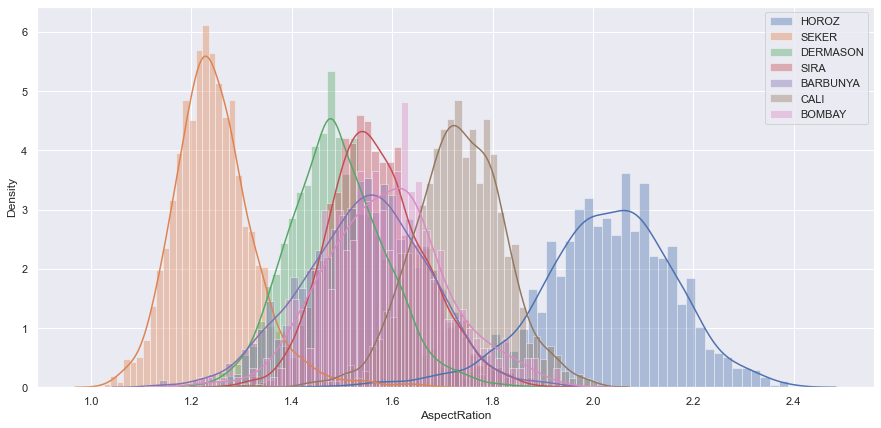

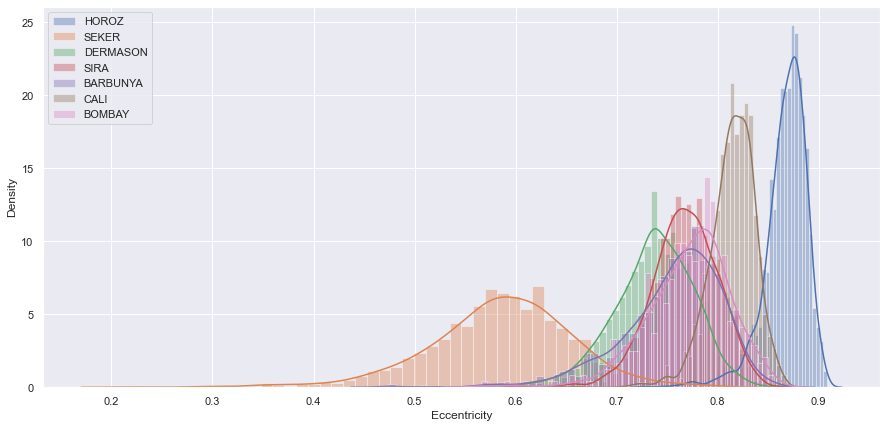

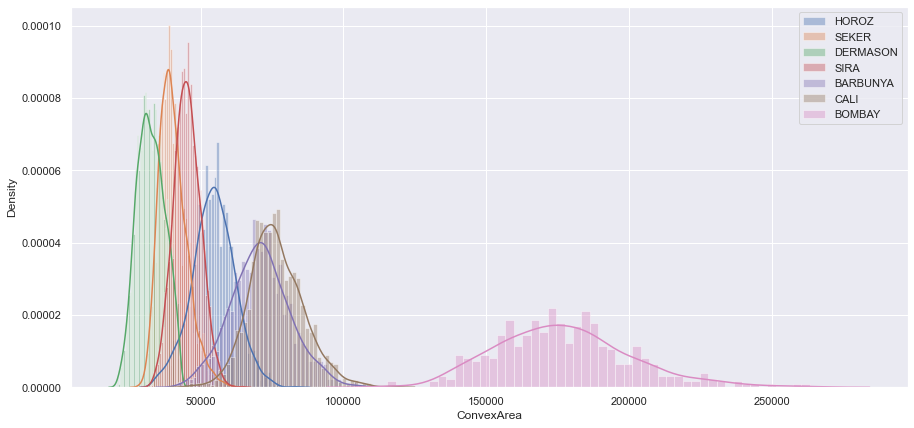

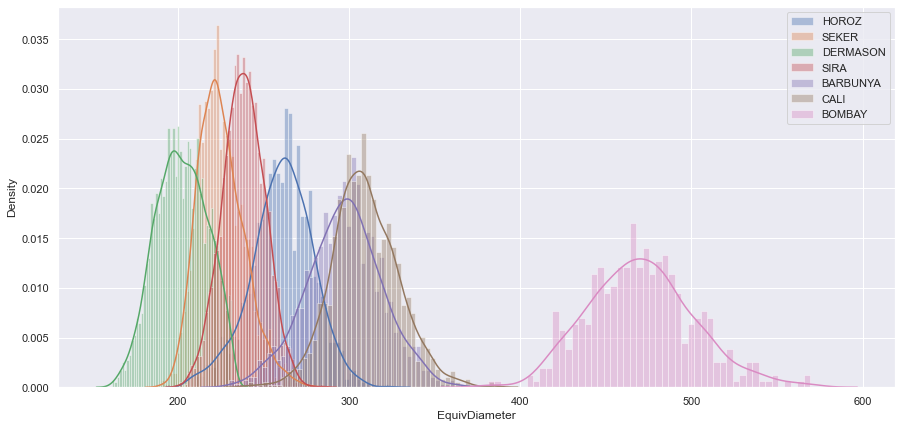

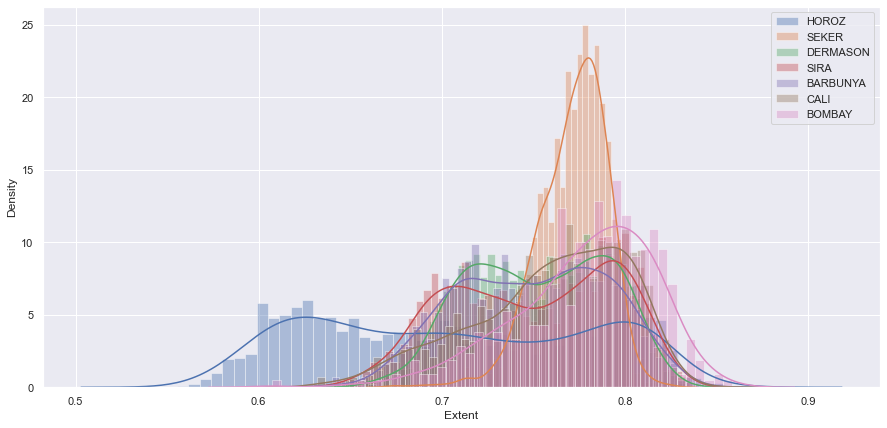

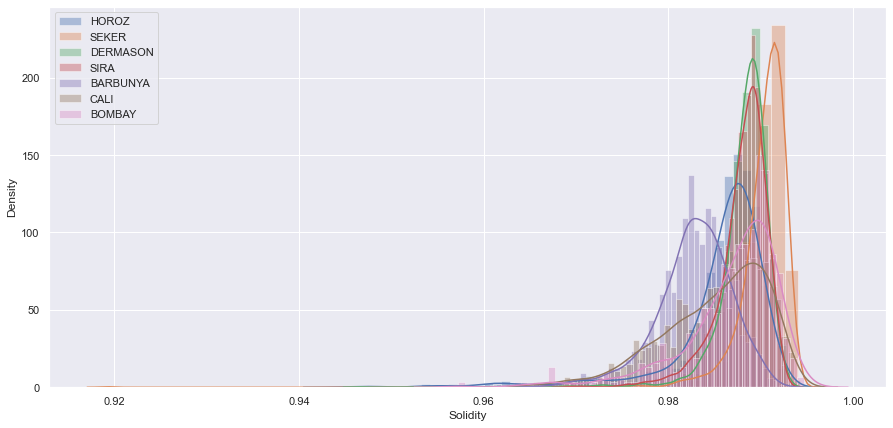

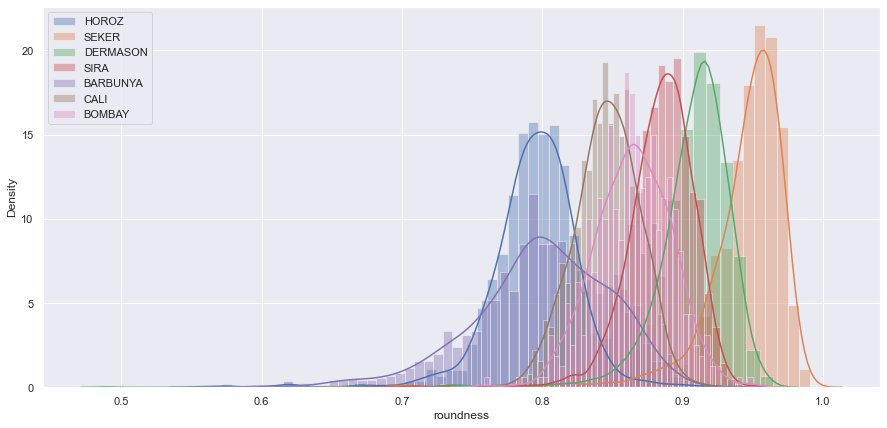

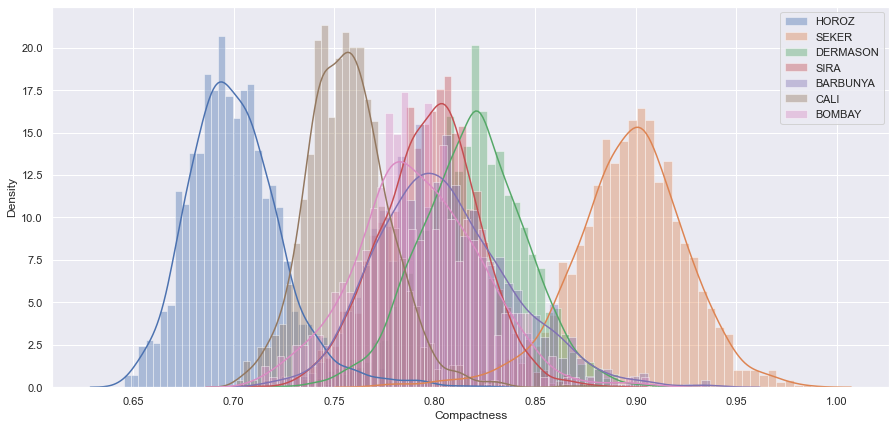

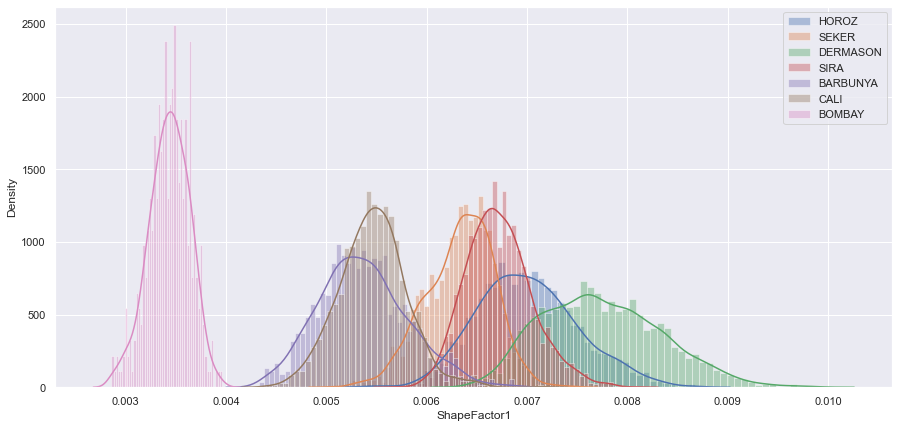

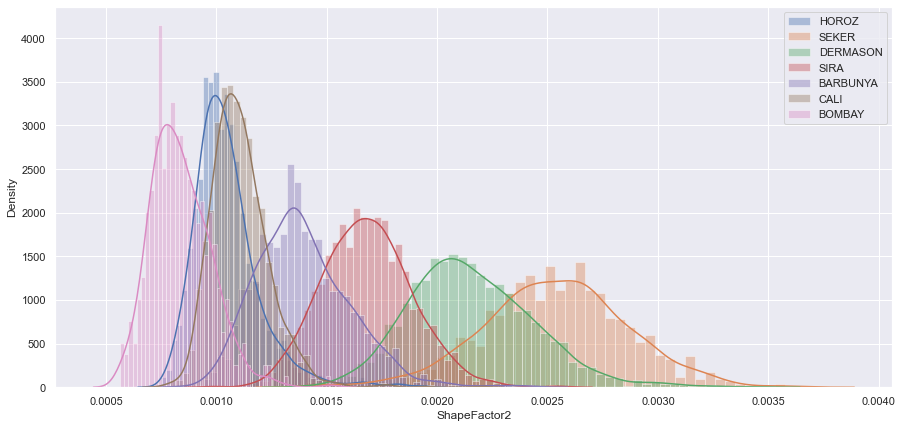

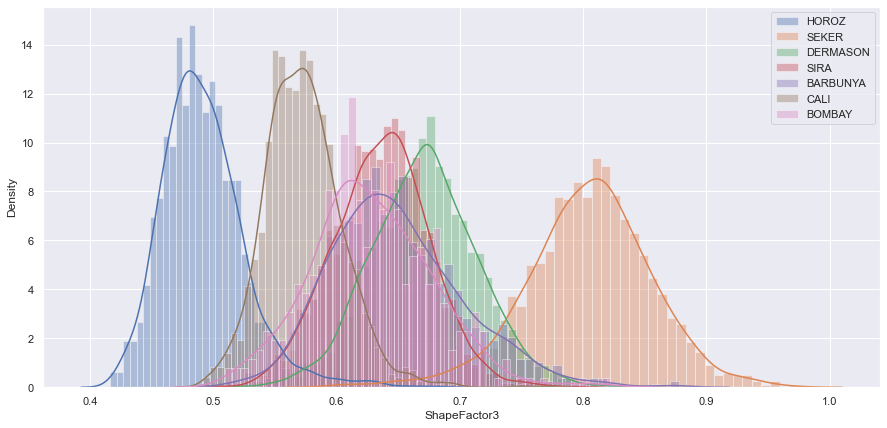

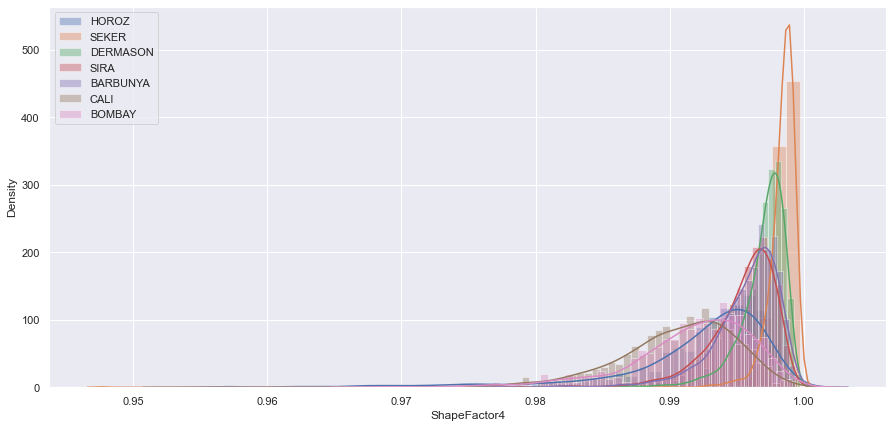

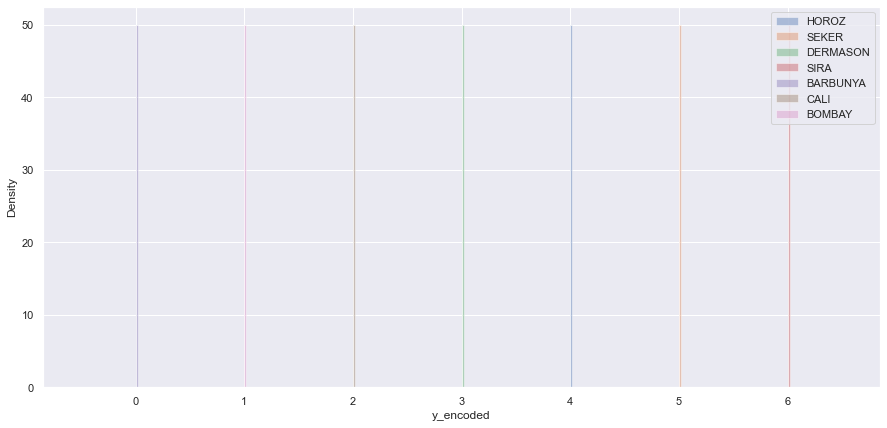

In [5]:
x = "Area"
for x in cols:
    df_data_0 = df_data[df_data["y"] == "HOROZ"]
    df_data_1 = df_data[df_data["y"] == "SEKER"]
    df_data_2 = df_data[df_data["y"] == "DERMASON"]
    df_data_3 = df_data[df_data["y"] == "SIRA"]
    df_data_4 = df_data[df_data["y"] == "BARBUNYA"]
    df_data_5 = df_data[df_data["y"] == "CALI"]
    df_data_6 = df_data[df_data["y"] == "BOMBAY"]

    sns.distplot(df_data_0[x],bins = 50, label="HOROZ")
    sns.distplot(df_data_1[x],bins = 50, label="SEKER")
    sns.distplot(df_data_2[x],bins = 50, label="DERMASON")
    sns.distplot(df_data_3[x],bins = 50, label="SIRA")
    sns.distplot(df_data_4[x],bins = 50, label="BARBUNYA")
    sns.distplot(df_data_5[x],bins = 50, label="CALI")
    sns.distplot(df_data_6[x],bins = 50, label="BOMBAY")

    if x == "Perimeter":
        plt.axvline(680)
    
    plt.legend()
    plt.xlabel(x)
    plt.show()

In [ ]:
final_df_data_copy = df_data.copy()

In [ ]:
final_df_data_copy.columns

# Editting columns

In [ ]:
final_df_data_copy =  df_data.copy()
final_df_data_copy["roundness"] = np.log10(final_df_data_copy["roundness"])
final_df_data_copy["Solidity"] = np.exp2(np.exp2(final_df_data_copy["Solidity"]))
final_df_data_copy["ConvexArea"] = np.log10(final_df_data_copy["ConvexArea"])

In [ ]:
df_data.columns

In [ ]:
"Perimeter","MajorAxisLength"
final_df_data_copy["is_sira"] = (final_df_data_copy["Perimeter"] > 750) * (final_df_data_copy["Perimeter"] < 840)\
                              * (final_df_data_copy["MajorAxisLength"] > 270) * (final_df_data_copy["MajorAxisLength"] < 350)
final_df_data_copy["is_dermason"] = (final_df_data_copy["Area"] < 33000)* (final_df_data_copy["MajorAxisLength"] < 680)

In [ ]:
def log_transform_clean(x):
    if x>0:
        return np.log(x)
    else:
        return 0  
    
lst_cols = ["ShapeFactor4"]
for name in lst_cols:
    if name != "y":
        if final_df_data_copy[name].min() > 0:
            box_cox, lmbda = stats.boxcox(final_df_data_copy[name])
            final_df_data_copy[name+"_bc"]= box_cox
            fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize = (15,7)) 
            plt.subplots_adjust(left=None, bottom=5, right=None, top=6, wspace=None, hspace=None) 
            sns.histplot(final_df_data_copy[name], ax=ax1)
            sns.histplot(final_df_data_copy[name+"_bc"], ax=ax2,bins=50)
    else: continue

In [ ]:
cols_to_scale = [
'ConvexArea',
'Solidity',
 'roundness',
]

In [ ]:
final_df_data_copy.columns

In [ ]:
sns.heatmap(final_df_data_copy.corr(),annot=True)

# Choosing the model

In [ ]:
selected_features = [
#'ID',
'Area',
'ConvexArea',
'Perimeter',
'MajorAxisLength',
'MinorAxisLength',
'AspectRation',
'Eccentricity',
'EquivDiameter',
'Extent',
'Solidity',
'roundness',
'Compactness',
'ShapeFactor1',
'ShapeFactor2',    
'ShapeFactor3',  # مفرقتش كتير يعنى
'ShapeFactor4',
"is_sira",
"is_dermason"
]

In [ ]:
#X_train ,X_test ,y_train ,y_test  =train_test_split(final_df_data_copy[selected_features],final_df_data_copy["y_encoded"],test_size=.2)
# All Data 
X_train = final_df_data_copy[selected_features]
y_train = final_df_data_copy["y_encoded"]

In [ ]:
%time
clf = CatBoostClassifier(depth = 10, iterations= 100, learning_rate= 0.04 ,random_seed = 0,silent=True)
clf.fit(X_train, y_train)

In [ ]:
#y_pred = clf.predict(X_test)

In [ ]:
#accuracy_score(y_test, y_pred)

In [ ]:
#clf.predict_proba(X_test)

In [ ]:
#f1_score(y_test, y_pred,average="weighted")

In [ ]:
df_test = pd.read_csv("data/test.csv")
df_test

# Creating Submission

In [ ]:
df_test["roundness"] = np.log10(df_test["roundness"])
df_test["Solidity"] = np.exp2(np.exp2(df_test["Solidity"]))
df_test["ConvexArea"] = np.log10(df_test["ConvexArea"])
df_test["is_sira"] = (df_test["Perimeter"] > 750) * (df_test["Perimeter"] < 840) \
                    * (df_test["MajorAxisLength"] > 270) * (df_test["MajorAxisLength"] < 350)
df_test["is_dermason"] = (df_test["Area"] < 33000)* (df_test["MajorAxisLength"] < 680)
df_test_selected = df_test[selected_features]
y_pred = clf.predict(df_test_selected)
df_test["y"] = or_enc.inverse_transform(y_pred.reshape(-1,1))
df_test.set_index("ID",inplace=True)
df_test[["y"]].to_csv("submission1.csv")